# Классификация и PCA

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

## Несколько последних моментов по регрессии

1. Категориальные переменные - при one-hot не все включать, коллинеарность!
2. Нормализация и стандартизация.
3. [L1, L2](https://en.wikipedia.org/wiki/Lp_space#Definition), max метрики.
4. Понимание коэффициентов в логистической регрессии.
5. [Шансы](https://en.wikipedia.org/wiki/Odds)
![](images/logit.png)
6. LASSO и [RIDGE](https://en.wikipedia.org/wiki/Tikhonov_regularization).
7. [Проклятие размерности](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8)
![](http://content.edupristine.com/images/blogs/curse-of-dimensionality_2.png)

In [2]:
probabilities = np.arange(0.1, 1, 0.1)
for p in probabilities:
    odds = p/(1-p)
    if odds < 1:
        print u'Вероятность {}. Шанс 1 к {}'.format(p, round(1/odds, 2))
    else:
        print u'Вероятность {}. Шанс {} к 1'.format(p, round(odds, 2))

Вероятность 0.1. Шанс 1 к 9.0
Вероятность 0.2. Шанс 1 к 4.0
Вероятность 0.3. Шанс 1 к 2.33
Вероятность 0.4. Шанс 1 к 1.5
Вероятность 0.5. Шанс 1.0 к 1
Вероятность 0.6. Шанс 1.5 к 1
Вероятность 0.7. Шанс 2.33 к 1
Вероятность 0.8. Шанс 4.0 к 1
Вероятность 0.9. Шанс 9.0 к 1


In [3]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import normalize, scale
print normalize([3, 4, 5], norm='l1')
print normalize([3, 4, 5], norm='l2')
print normalize([3, 4, 5], norm='max')
# scale - метод sklearn для стандартизации
print scale([3, 4, 5])

[[ 0.25        0.33333333  0.41666667]]
[[ 0.42426407  0.56568542  0.70710678]]
[[ 0.6  0.8  1. ]]
[-1.22474487  0.          1.22474487]


/home/modintsov/.virtualenvs/ds2017/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/modintsov/.virtualenvs/ds2017/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/modintsov/.virtualenvs/ds2017/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sin

Часть "средних" данных 2-мерном пространстве: 0.785398163397. желательно от 4 записей
Часть "средних" данных 3-мерном пространстве: 0.523598775598. желательно от 6 записей
Часть "средних" данных 4-мерном пространстве: 0.308425137534. желательно от 10 записей
Часть "средних" данных 5-мерном пространстве: 0.164493406685. желательно от 19 записей
Часть "средних" данных 6-мерном пространстве: 0.0807455121883. желательно от 38 записей
Часть "средних" данных 7-мерном пространстве: 0.0369122341432. желательно от 82 записей
Часть "средних" данных 8-мерном пространстве: 0.0158543442438. желательно от 190 записей
Часть "средних" данных 9-мерном пространстве: 0.00644240020066. желательно от 466 записей
Часть "средних" данных 10-мерном пространстве: 0.00249039457019. желательно от 1205 записей
Часть "средних" данных 11-мерном пространстве: 0.000919972597358. желательно от 3261 записей
Часть "средних" данных 12-мерном пространстве: 0.000325991886927. желательно от 9203 записей
Часть "средних" данны

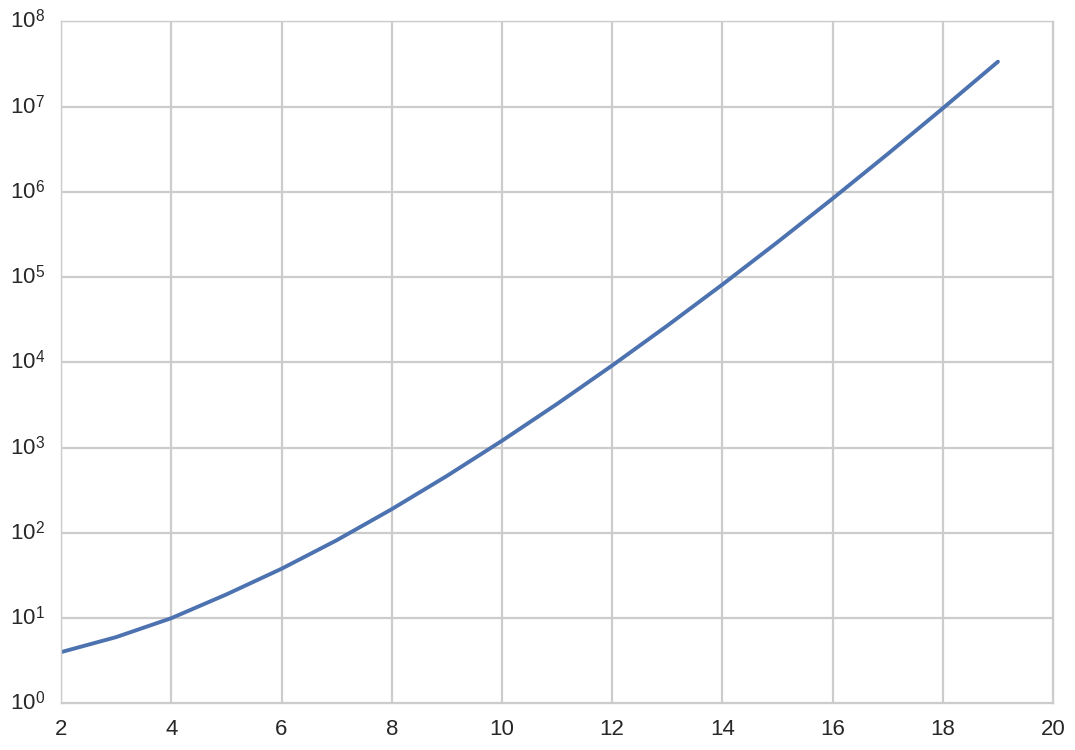

In [4]:
import math
from scipy.special import gamma
def unit_radius_hypersphere_volume(n):
    return sp.pi ** (n/float(2)) / gamma(1 + n/float(2))
def unit_radius_hypercube_volume(n):
    return 2 ** n

record_counts_needed = []
dimensions = np.arange(2,20)
for dimensionality in dimensions:
    fraction = unit_radius_hypersphere_volume(dimensionality)/unit_radius_hypercube_volume(dimensionality)
    record_count_needed = int(math.ceil(3/fraction))
    print u'Часть "средних" данных {}-мерном пространстве: {}. желательно от {} записей'.format(dimensionality, 
                                                                      fraction, record_count_needed)

    record_counts_needed.append(record_count_needed)
    
plt.semilogy(dimensions, record_counts_needed)

## Задача классификации

[CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/classification/#nn)
![](http://cs231n.github.io/assets/classify.png)

Огромное количество потенциальных проблем

![](http://cs231n.github.io/assets/challenges.jpeg)

1. [Обучение с учителем](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC) - supervised learning
2. [Обучение без учителя](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B5%D0%B7_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F) - unsupervised learning

![](http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex8materials/ex8b_10.png)

[Выбор признаков](https://en.wikipedia.org/wiki/Feature_selection)

### [Метод ближайших соседей](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9) - kNN

[Диаграмма Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE)

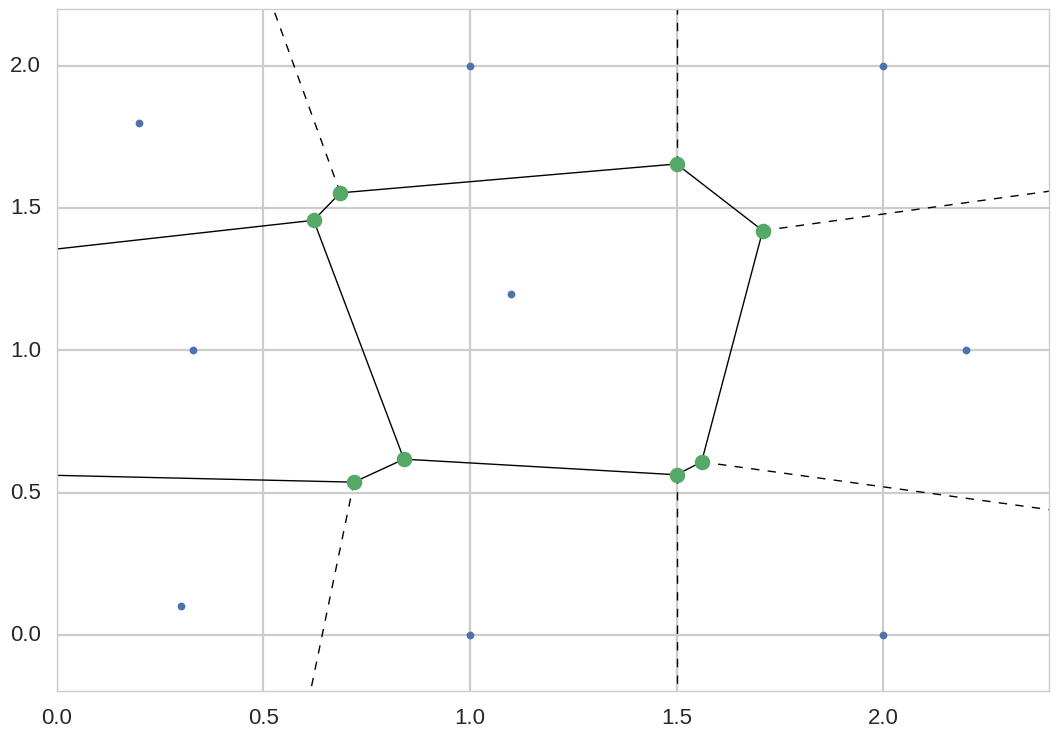

In [5]:
points = np.array([[0.3, 0.1], [0.33, 1], [0.2, 1.8], [1, 0], [1.1, 1.2], [1, 2],
                   [2, 0], [2.2, 1], [2, 2]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
plot = voronoi_plot_2d(vor)

1-NN

1. Простой и эффективный для малых размерностей. 
2. Грубая граница с "островами".
3. Сложность и точность обучения?
4. Сложность предсказания?
5. Variance/Bias?

k-NN

1. Сглаживаем границы, избавляемся от "островов".
2. При больших k границы может быть слишком гладкой.
3. Понижаем Variance, повышаем Bias.
4. Как выбрать идеальный параметр k?

[KNN complete guide](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

![](https://image.slidesharecdn.com/pycon2015-150913033231-lva1-app6892/95/pycon-2015-48-638.jpg?cb=1442115225)

Для kNN лучший результат - 38% точность. Какие проблемы такого подхода?

![](http://cs231n.github.io/assets/samenorm.png)

Выход? [Feature extraction](https://en.wikipedia.org/wiki/Feature_extraction)!

![](https://i.stack.imgur.com/2MrZg.png)

Больше признаков - лучше?.. Больше признаков - хуже?..

Нужно признаков достаточно, но не избыточно. Выход - [метод главных компонент (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)!

Цель - найти основные направления наибольшей дисперсии. Наша цель ведь ОТЛИЧИТЬ разные классы друг от друга?

![](http://weigend.com/files/teaching/stanford/2008/stanford2008.wikispaces.com/file/view/pca_example.gif)

![](https://i.stack.imgur.com/lNHqt.gif)

Для тех, кто хочет вникнуть в математику - [Tutorial on PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)

Отличие от линейной регрессии? Разные направления оптимизации.

![](https://i.stack.imgur.com/ozqBY.png)
![](https://i.stack.imgur.com/pHbub.png)
![](https://i.stack.imgur.com/bOl5N.png)

Реконструкция исходных данных используя PCA

![](https://kaggle2.blob.core.windows.net/prospector-files/3ced184b-06c2-4655-ab43-b6c6da87b968/f163d68e7e64508580bda2ecaaf6273b/figure_3.png)

In [6]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, 
                colorscale=cmap_light, cdiscrete=cmap_bold, 
                alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

## Классификация пола по данным о росте и весе.

In [7]:
dflog=pd.read_csv("data/01_heights_weights_genders.csv")
dflog.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

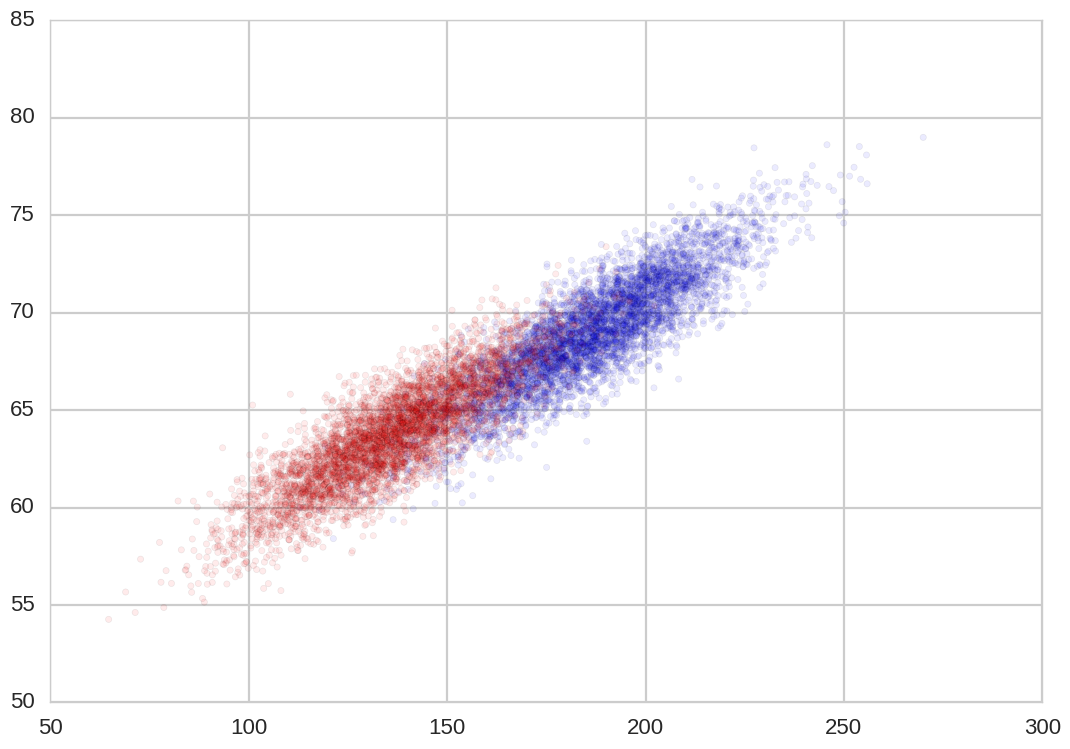

In [8]:
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], alpha=0.08);

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    kf = KFold(nfold, shuffle=True)
    for train, test in kf.split(y): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [10]:
from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, 
                                              (dflog.Gender=="Male").values)

In [11]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C = C
print max_score, best_C

0.920533333333 100


In [12]:
clfl=LogisticRegression(C=best_C)
clfl.fit(Xlr, ylr)
ypred=clfl.predict(Xtestlr)
accuracy_score(ypred, ytestlr)

0.91439999999999999

In [13]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=10, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 0.1},
 0.9204,
 {'mean_fit_time': array([ 0.01409738,  0.01416256,  0.01409829,  0.01422191,  0.01430006,
          0.01373739]),
  'mean_score_time': array([ 0.00056393,  0.00039959,  0.0004091 ,  0.00041459,  0.00045474,
          0.0005527 ]),
  'mean_test_score': array([ 0.91973333,  0.92      ,  0.9204    ,  0.9204    ,  0.9204    ,
          0.9204    ]),
  'mean_train_score': array([ 0.91957039,  0.91995557,  0.92040001,  0.92038519,  0.92038519,
          0.92038519]),
  'param_C': masked_array(data = [0.0001 0.001 0.1 1 10 100],
               mask = [False False False False False False],
         fill_value = ?),
  'params': ({'C': 0.0001},
   {'C': 0.001},
   {'C': 0.1},
   {'C': 1},
   {'C': 10},
   {'

In [14]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

0.91439999999999999

In [15]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print "BEST PARAMS", gs.best_params_
    best = gs.best_estimator_
    return best

In [16]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, 
                standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    return clf, Xtrain, ytrain, Xtest, ytest

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.92


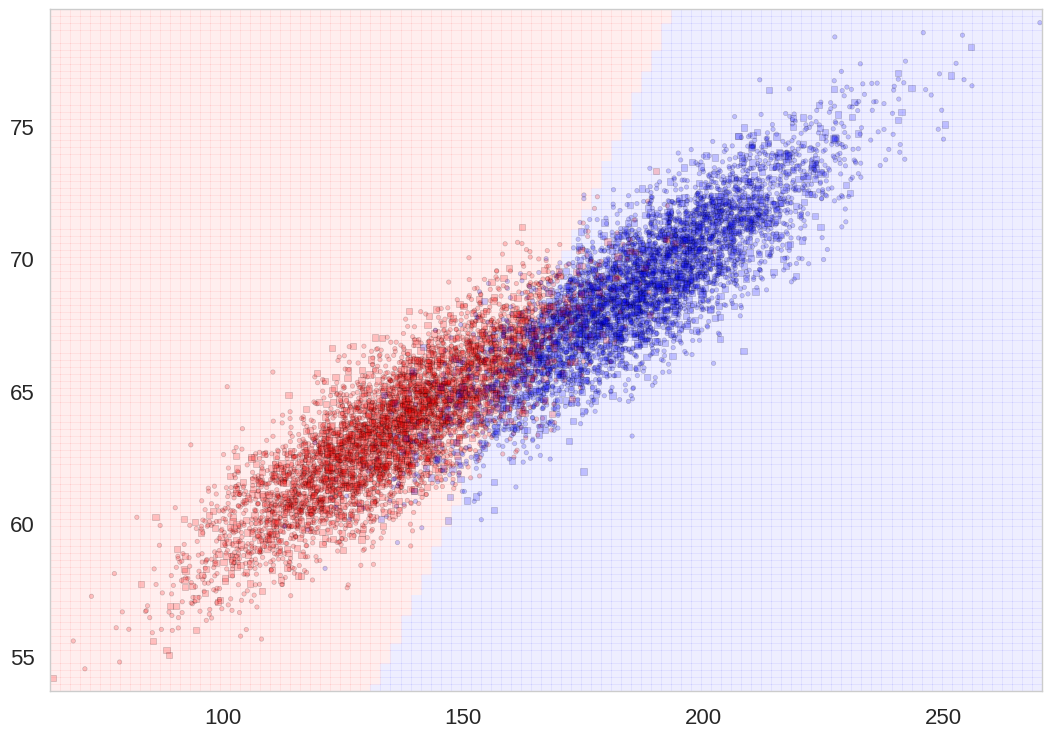

In [17]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           dflog, ['Weight', 'Height'], 'Gender','Male')
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

In [18]:
clf_l.predict_proba(Xtest_l)

array([[ 0.02207033,  0.97792967],
       [ 0.67888865,  0.32111135],
       [ 0.86284135,  0.13715865],
       ..., 
       [ 0.97477096,  0.02522904],
       [ 0.22781678,  0.77218322],
       [ 0.0303225 ,  0.9696775 ]])

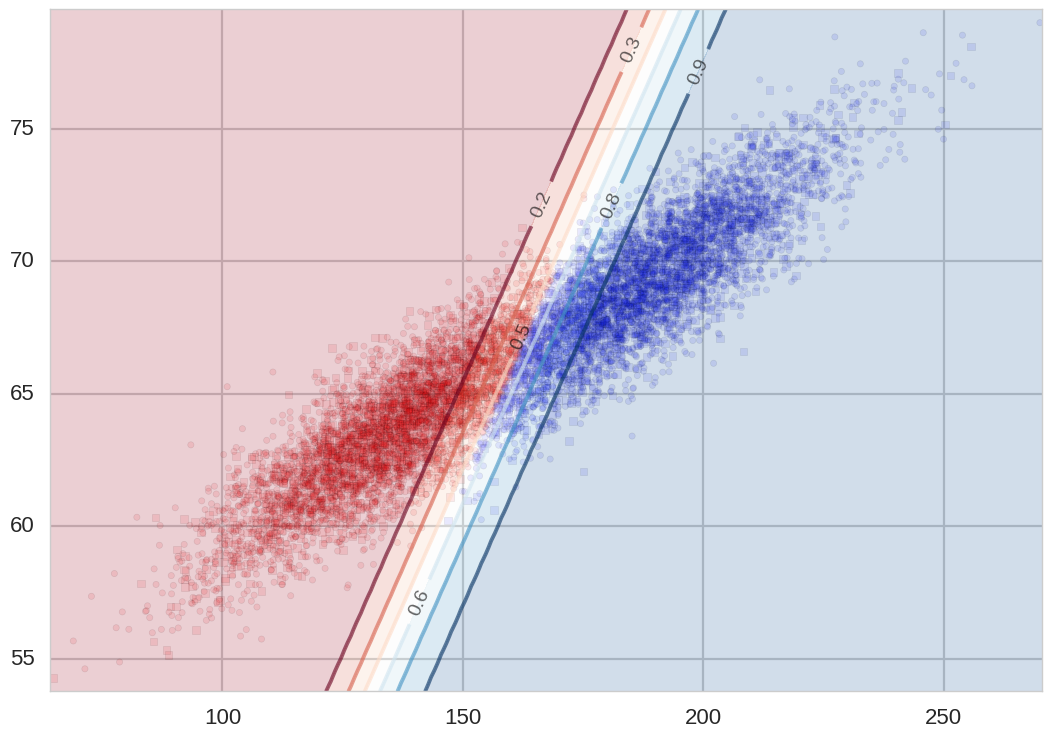

In [19]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1)

BEST PARAMS {'n_neighbors': 3}
Accuracy on training data: 0.94
Accuracy on test data:     0.90


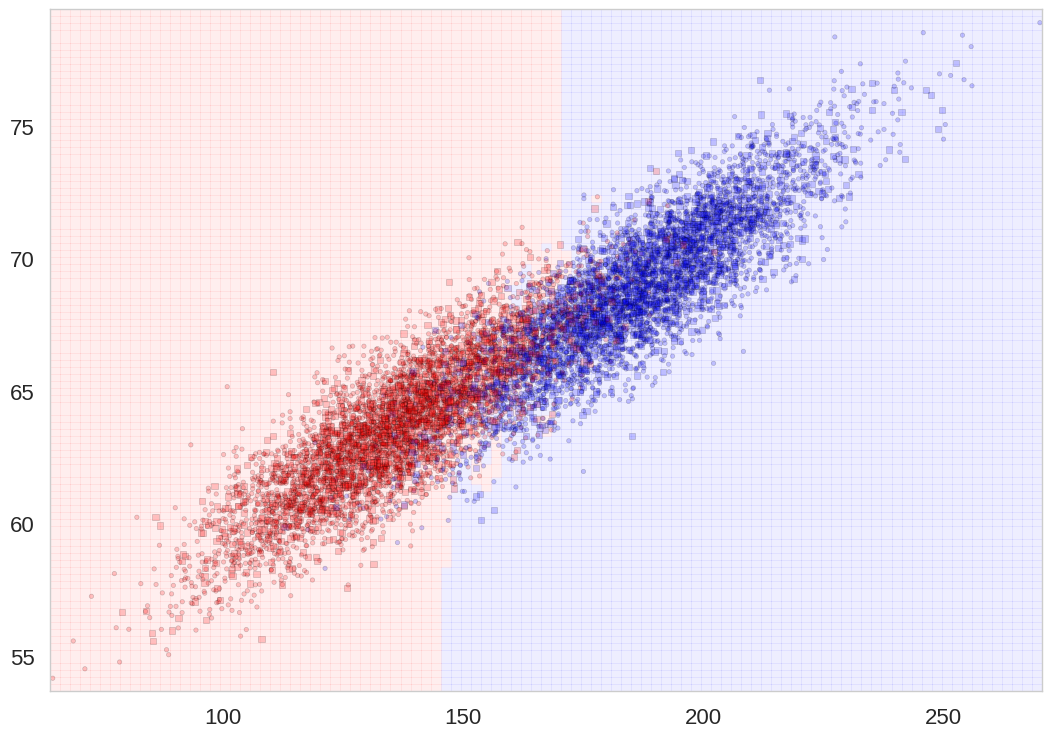

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(KNeighborsClassifier(), {"n_neighbors": [1, 3]}, 
                                                           dflog, ['Weight', 'Height'], 'Gender','Male')
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

<function __main__.points_plot_prob>

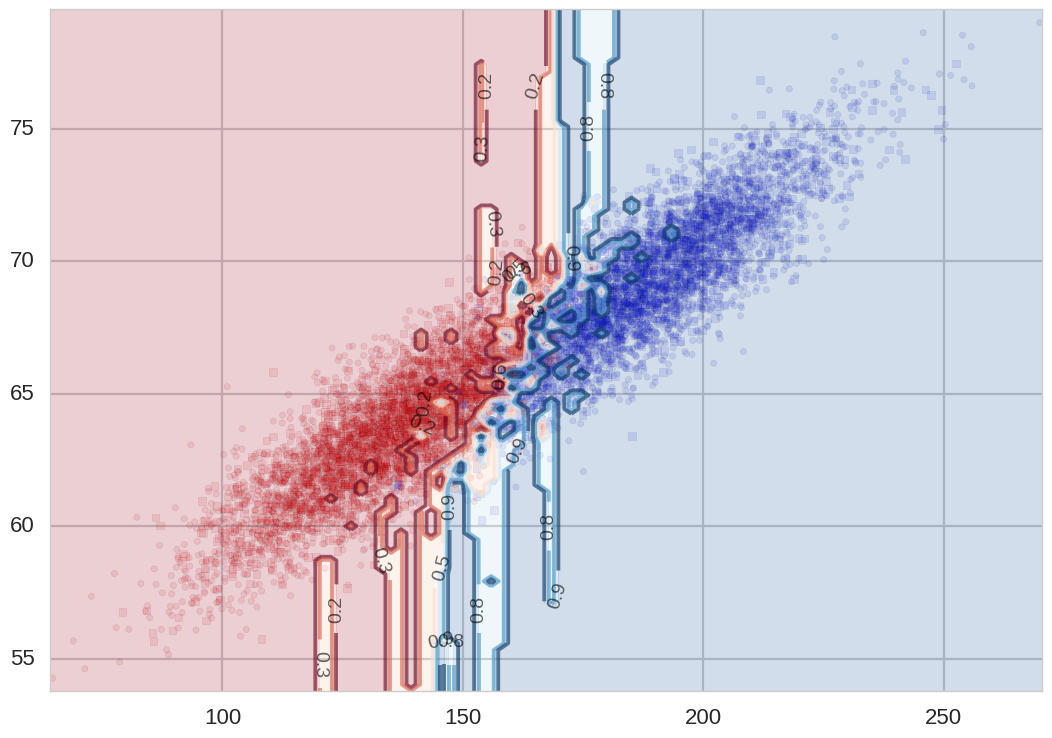

In [21]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1);points_plot_prob

[Discriminative model](https://en.wikipedia.org/wiki/Discriminative_model) vs Discriminant classifier vs [Generative model](https://en.wikipedia.org/wiki/Generative_model)

Estimation Risk vs Decision Risk

## Банкомат и демонстрация PCA для данных с множеством параметров

In [22]:
data=np.load("data/imag.pix.npy")
y=np.load("data/imag.lbl.npy")
STANDARD_SIZE = (322, 137)  #standardized pixels in image.
data.shape, y.shape

((87, 132342), (87,))

In [23]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

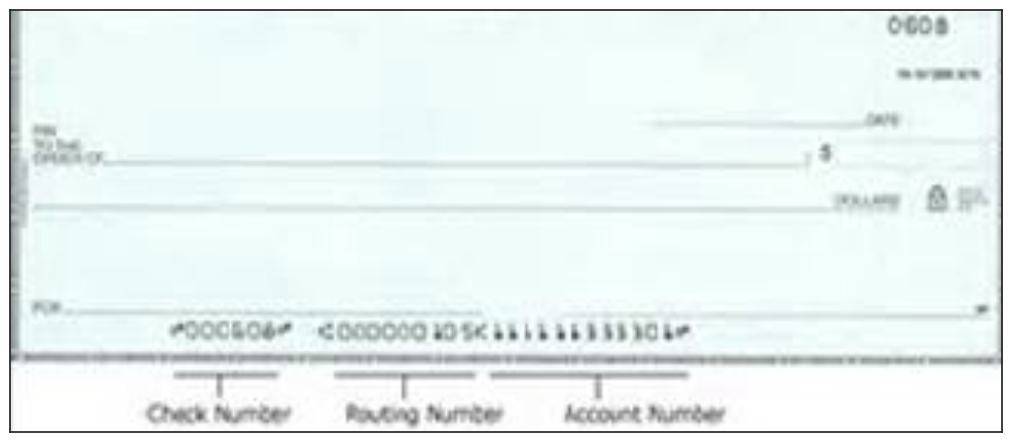

In [24]:
display_image(data[1])

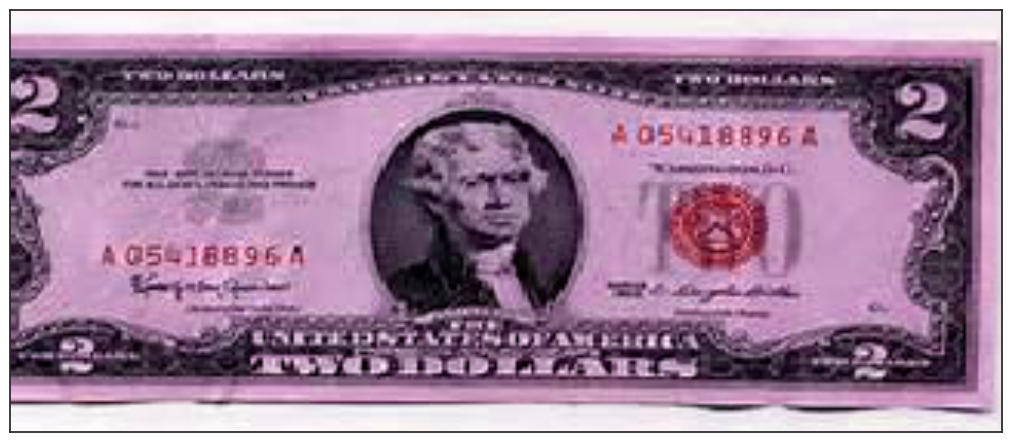

In [25]:
display_image(data[55])

Сколько признаков? Значение каждого из трех каналов, каждого пикселя - отдельный признак!

In [26]:
322 * 137 * 3

132342

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [28]:
print pca.explained_variance_ratio_.sum()

0.942574423027


In [29]:
pca.explained_variance_ratio_*100

array([ 35.92596698,   6.29318801,   4.10778347,   3.11950952,
         2.81695972,   2.28831619,   2.10127948,   1.87404974,
         1.73264637,   1.53023762,   1.42159662,   1.31839389,
         1.24701519,   1.16381731,   1.0995822 ,   1.06073064,
         1.00742939,   0.98023646,   0.96055842,   0.9153557 ,
         0.90184074,   0.85212598,   0.8367414 ,   0.79690964,
         0.75488856,   0.72502317,   0.70818837,   0.67964265,
         0.66085139,   0.64767459,   0.6273476 ,   0.59469937,
         0.58294441,   0.57436363,   0.57263452,   0.55260021,
         0.53843162,   0.53334337,   0.51648682,   0.49286763,
         0.48521237,   0.47694382,   0.47221313,   0.45525786,
         0.44289675,   0.43948046,   0.43302455,   0.42763727,
         0.42124202,   0.40885774,   0.40303331,   0.39189983,
         0.38914709,   0.38166236,   0.3765402 ,   0.36303421,
         0.3557619 ,   0.3489648 ,   0.3378219 ,   0.33255214])

In [30]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

label  y           pc1          pc2          pc3          pc4          pc5          pc6          pc7          pc8          pc9         pc10         pc11         pc12         pc13         pc14         pc15         pc16         pc17        pc18         pc19         pc20         pc21        pc22         pc23         pc24         pc25         pc26         pc27         pc28         pc29         pc30         pc31         pc32         pc33         pc34         pc35         pc36         pc37  \
0  check  1 -22536.362571 -2428.343598 -2133.775388  -328.324188 -1065.236203    79.785382  -425.018883   622.492926 -2490.226102  -858.690204 -1072.434320   276.953708 -1117.046948   713.591264  -787.715044   415.023857  -196.458960  473.306255  -429.003193  -608.647991  -590.747440 -266.321161  -988.912607   955.460033  1036.258779   572.727113   -42.451299  -119.746104  -530.188720   546.369384  -648.101778    69.279259  -740.716512  1290.289970  -506.407863  -120.137141   503.688726   
1  check  1 -22226.658684  -709.255355  -288.824742 -1300.643987  -792.076686   217.455675  1076.774064 -2115.131169  -875.505004 -1124.991546  -342.957173   -43.464206   548.211064   358.457553 -1762.122121  -371.461339   813.673516  294.304812  -940.431745   155.278551 -1123.823468  507.191628  -818.184107   721.835204   288.865145  -112.694294   816.391674  1142.898232  -361.922239   116.386700  -857.029834   586.298748   307.978115   210.534567  -668.281095  -658.325016  -105.516751   
2  check  1 -17364.260784 -4252.027944   793.804907 -1362.058673  -374.233295  3142.119552  2514.273150  1443.762802  -121.026824  -419.300350 -2082.976814  1717.976912  -723.291433 -1241.537357  -312.578473 -1058.056662  1385.096578 -801.404864 -2599.587975  -881.090508  3391.820029 -395.905866 -3415.224017  1332.007198 -4749.485490  1026.949822  2204.552486  -673.261373  1404.782685 -2127.590066  -661.975549  1715.911378  1748.593057 -3035.759163 -1041.925548  2255.954630 -3055.808756   
3  check  1 -22847.256199  -900.589854   577.197122  -180.319694  -733.119623  -107.980313  1441.860151 -1069.638816   844.603739 -1391.255702  1471.132691  -724.457298  -579.776293  -255.497517   935.195553   167.344974  -302.781950  875.937380  -176.386946  1238.792805   534.939001 -159.349664  -331.360474  -370.006623  -950.015780   211.052433  1320.754260    50.095774  -314.072067  -483.365290  -162.464214  -137.803953    94.372199   754.690055  -200.243191   624.724356   376.559995   
4  check  1 -15868.672595  3259.491123   506.802692  -919.623968  2166.544103  -981.605971 -1669.720221  -391.260434  1735.747025   163.845328 -1627.407481  -556.446731  -862.406113  1721.448898   945.510147 -1134.347093  2138.132575  766.600318 -1094.422431   602.599341   -25.751392   83.957960  -505.865467  1112.367094   332.146915 -1224.896349  -717.524872  -714.494542  -145.690931  -924.283392  1033.827775 -3605.017890  2134.261880 -3317.222694 -1241.958000 -2130.499002  1904.122980   

          pc38         pc39        pc40         pc41         pc42         pc43         pc44        pc45         pc46        pc47         pc48         pc49         pc50         pc51         pc52         pc53         pc54         pc55         pc56        pc57         pc58         pc59         pc60  
0   297.196006  -257.320768    8.290028  -424.334768   751.513216   525.941759  -488.014636  449.812387  -182.443029 -117.470063   303.346697   541.382283  -579.441552  -428.585267   230.059296   375.847827   -80.326231  -215.605977  -460.659924  117.468776   -94.070513  -312.238052  -154.934875  
1  -194.426618  -144.205080 -389.484028   166.761820     9.906824   754.143145    -4.364909  264.105386   -13.863650    1.489358   216.803564 -1128.829326   260.967703  -298.189725     3.270002   178.958713   419.103439   563.082553  -428.147585  203.252487    24.565596  -262.746273    45.973444  
2  3078.312411   826.475574  367.722885  1746.747056 -3181.178769  3896.113744  1327.813406  632.872234   725.017651 -576.289784 -1327.

In [31]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

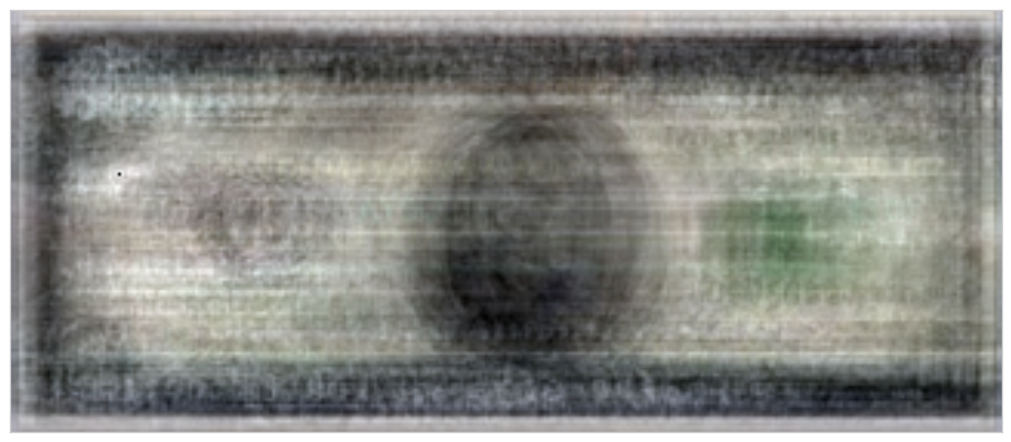

In [32]:
display_component(pca,0)

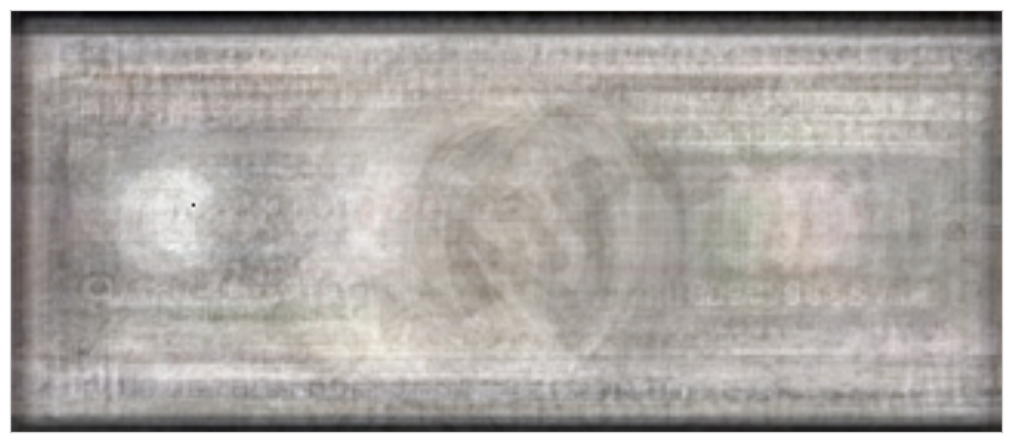

In [33]:
display_component(pca,1)

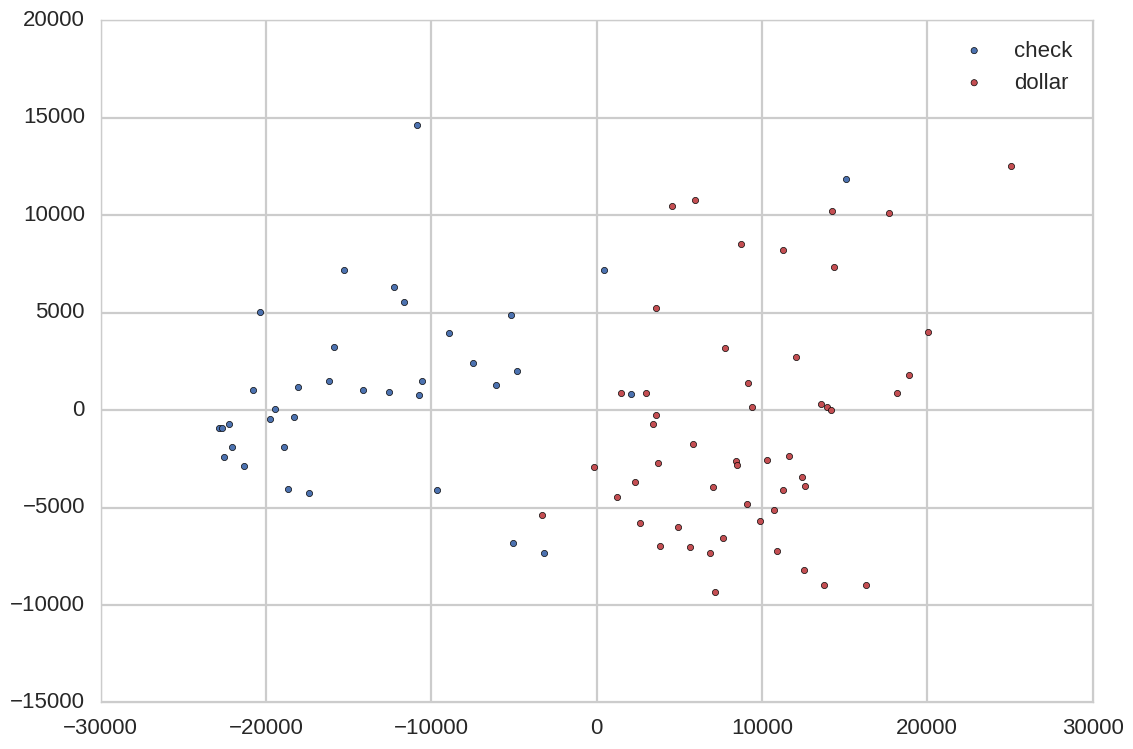

In [34]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

In [35]:
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print "Accuracy on training data: %0.2f" % (training_accuracy)
        print "Accuracy on test data:     %0.2f" % (test_accuracy)
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     0.91


(1, 1.0, 0.91428571428571426)

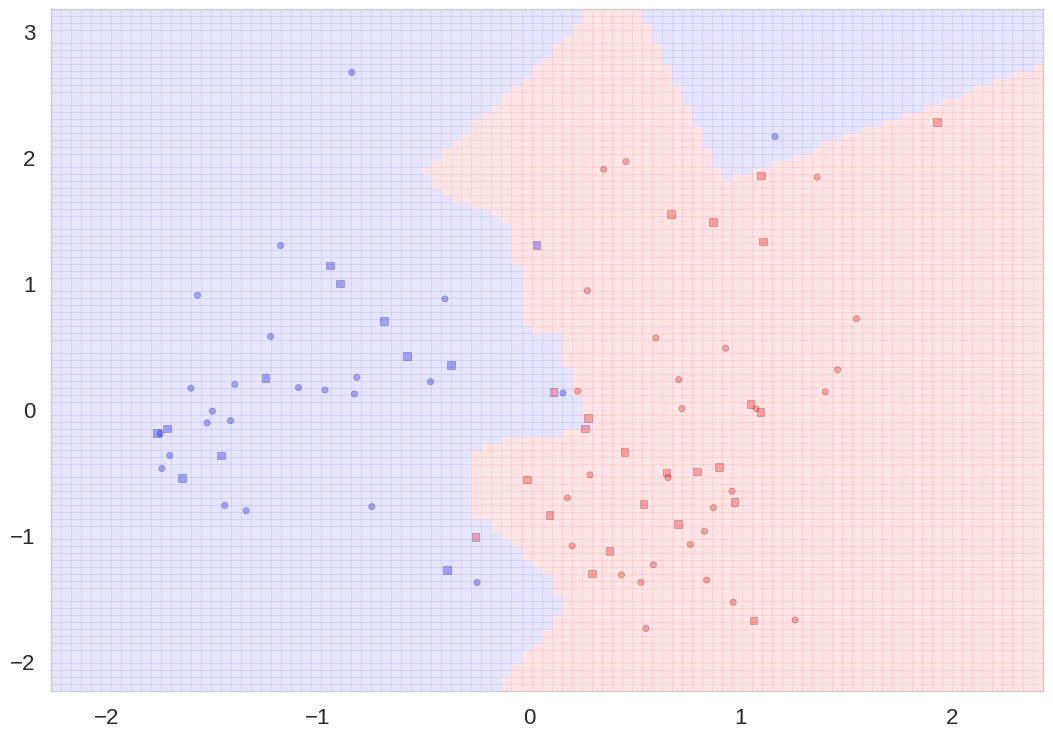

In [36]:
classify(Xs,ys,1)

Accuracy on training data: 0.62
Accuracy on test data:     0.54


(50, 0.61538461538461542, 0.54285714285714282)

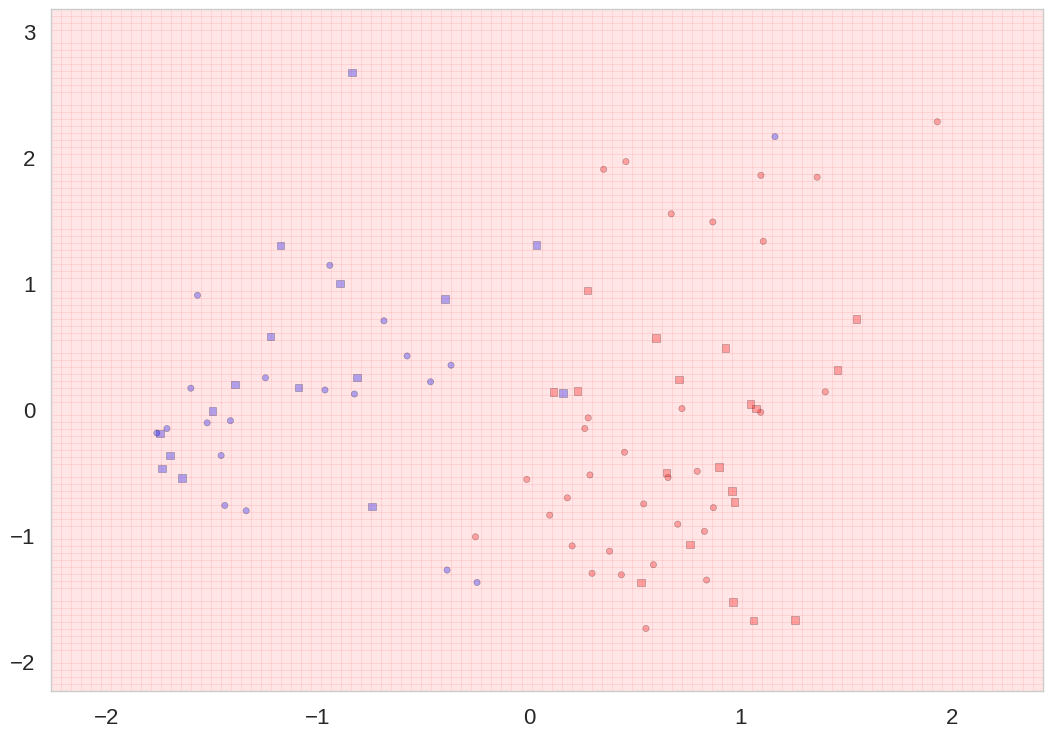

In [37]:
classify(Xs,ys,50)

In [38]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

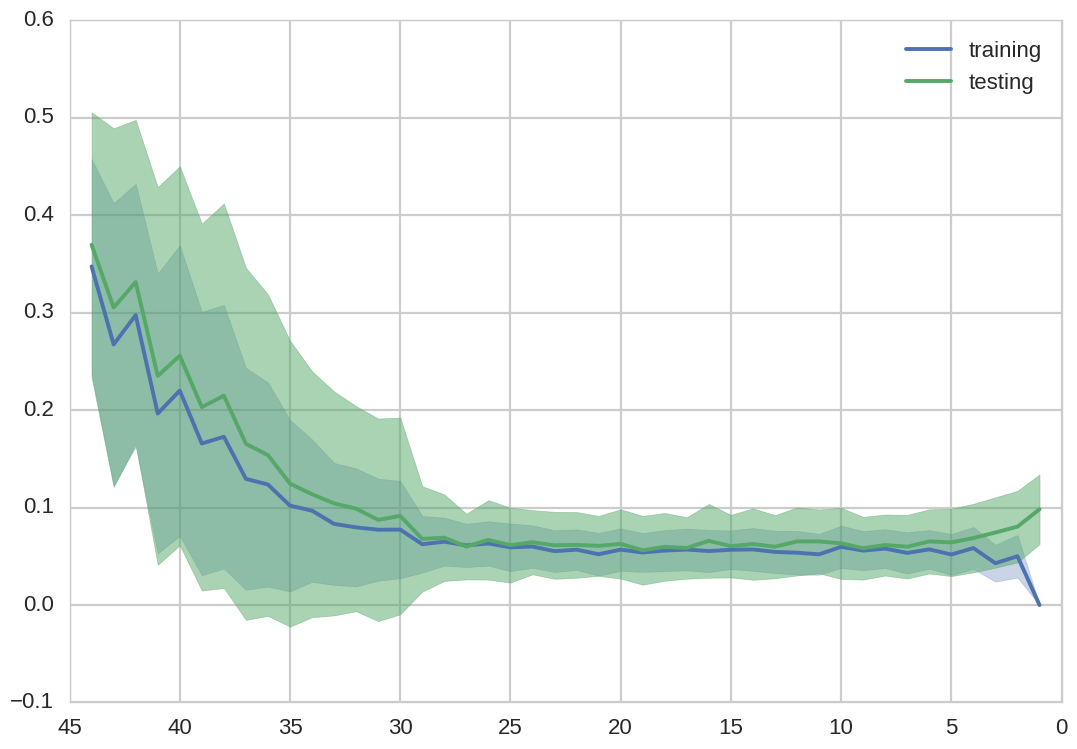

In [39]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)

plt.legend();

Accuracy on training data: 0.92
Accuracy on test data:     0.97


(7, 0.92307692307692313, 0.97142857142857142)

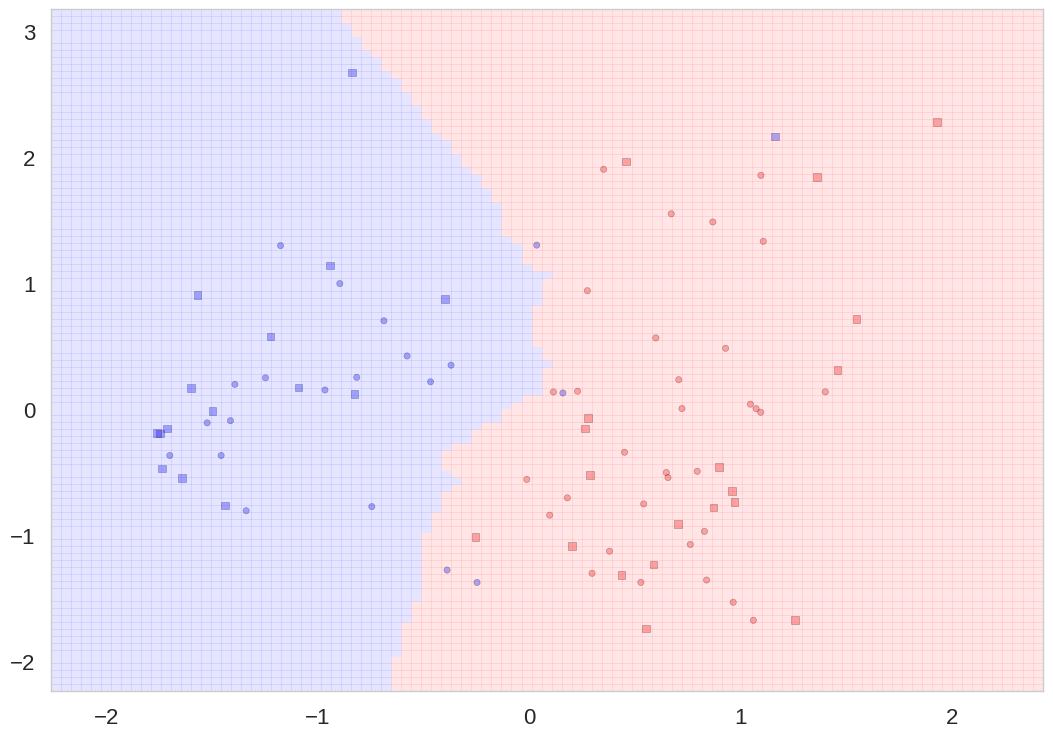

In [40]:
classify(Xs,ys,7)

In [41]:
df[ys != clf.predict(Xs)]

label  y           pc1           pc2           pc3          pc4           pc5           pc6          pc7          pc8          pc9         pc10         pc11         pc12         pc13         pc14         pc15         pc16         pc17         pc18         pc19         pc20         pc21         pc22         pc23         pc24         pc25         pc26         pc27         pc28         pc29         pc30         pc31         pc32        pc33         pc34         pc35         pc36  \
16   check  1   2067.055796    825.564775   1581.595348  4795.462097   -581.524191   -507.062152  -710.755794   511.409327 -1959.517695   248.150313  1392.513885 -1524.793637  1426.771020   791.454645  -328.865772  -542.392346  -569.664833  1516.290675   925.728087  1143.679795  1581.171167   533.219494   -68.245383  1904.535936  -259.536348  -602.977290   342.764864  -183.101760   338.844749   662.919610  -173.568982  -750.317151  -92.512639  -855.417078   966.338519   163.762324   
29   check  1  15081.130282  11879.432192  10060.633480  3223.561264   2162.012109   -223.336928  -414.990341  -505.690101  2939.963112  -224.519171 -2208.410184   786.990746   754.418695 -1355.769522  1509.350626 -1735.813405 -1125.893932  1228.708742  -253.532610 -1146.764492  3090.218680  -696.687906  -655.536970 -1051.831464  -720.406174   300.051861   598.805760  -942.518882  -214.991899    69.747349  -108.288072   816.417907 -354.099468  -442.367140  2477.491599  1078.869886   
31   check  1  -3199.803771  -7346.138161   -952.749597  1422.160118     41.556969   3745.898892   384.812184  2157.803948   207.597086  -632.670889 -2141.186497  3001.330622 -1647.089273 -2325.139944   598.725742 -2231.635386 -2164.974767 -1516.813213    88.485676   309.930267   471.673952   -79.927687 -1469.110734   353.501639 -1818.806447  1253.392279 -2320.463399 -1447.791180  1547.107240  2271.822245   281.237207  1563.621478  950.032825  -859.224739   133.660667  -883.941950   
35   check  1  -5037.843726  -6810.207835   5151.835695 -1354.278068    835.633549  12391.270320  8604.647528 -3690.455833  7925.012992    59.492010  6089.856374 -1005.833170 -4362.285758   749.886042  6617.369403  1097.091728 -4507.958360 -4022.083917  4698.859858  -962.249621  2373.543560  2112.281994  3506.759296  1292.709005   422.447202   367.682122   253.378739  1752.858922  -226.831876 -1039.249132   213.336074  -152.747881 -335.850575 -1474.071631 -1077.071186  -320.212517   
46  dollar  0   3570.000613   5235.716281  -7849.881640 -6443.343021  10085.378386   -282.720124  1521.111876 -3694.520116  1137.088879 -4524.448065 -5236.241682 -2872.254166   121.939877  -599.465251 -1767.490372 -1737.009455 -5850.205921 -1218.861836  -857.546070  3326.090882 -1317.830506 -1360.935416   308.649328  -207.543512  -639.894933   518.860546 -1886.915136   817.457749 -1101.599397  1844.596372 -2510.304578  1921.534671  152.075696   342.060031  -226.469405   345.260358   
61  dollar  0   4566.991628  10468.300184  -6422.834420 -5568.751937   7850.519193  -2601.888503  -306.940938  1529.733157  1417.378547  8270.537683  7452.553488 -4805.559650 -1342.008089  1118.642435   196.325960   885.291150 -1850.815008  1977.951244 -2168.802941  -461.232333   726.730786  -729.592222 -1201.337044  1012.488348  -607.444919 -3396.774644 -1489.876415 -2816.649418   220.342707  -723.151186  -856.015964  1486.715456   92.489333  -381.803449 -2534.976358 -1108.629734   
70  dollar  0   5936.861795  10801.936451  -5728.574334 -6708.948142  10969.797147    531.861414  1738.619610 -3043.153102 -1363.398168 -7740.732199 -4441.935932 -1710.947629   447.483406 -2484.790530 -1633.076818 -1424.310422 -2191.075504 -1305.920610   726.270880  1685.189369  -849.655396   541.305971   243.327424  1299.502550   623.030616  -229.024226  -430.385145   665.827034  -395.764309 -1117.199588  -259.078015 -1632.549244  804.385797   165.326188  1113.887093  1397.873512   

           pc37         pc38         pc39        pc40         pc41         pc42         pc43

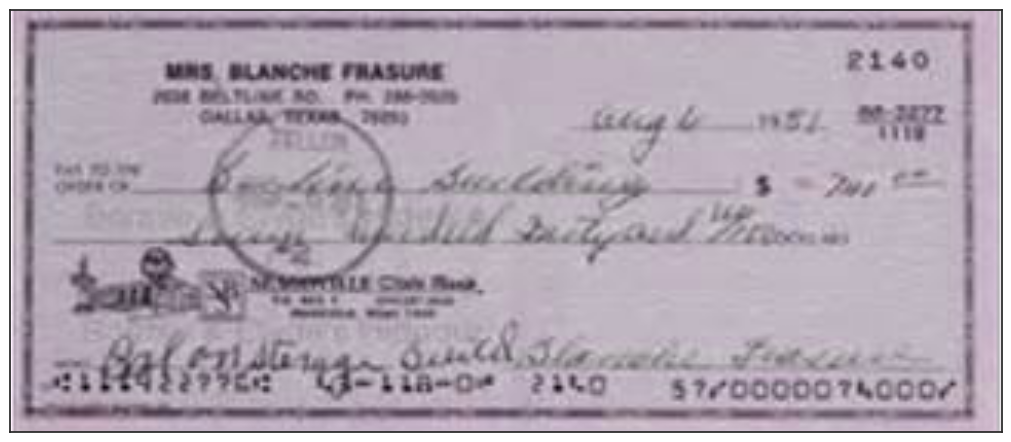

In [42]:
display_image(data[16])

### Домашнее задание

Аналогично предыдущему. Если в ваших данных есть категориальные переменные - можете 
использовать их, иначе - найдите открытый датасет и постройте классификационную модель 
на этих данных. Оцените accuracy_score получившейся модели.